# **DATA VISUALIZATION WITH PYTHON**


> Pada kali ini saya akan menyampaikan bagaimana cara memvisualisasikan data menggunakan bahasa pemrograman python. Namun, sebelum itu kita terlebih dahulu mempersiapkan dataset. Untuk kali ini saya menggunakan dataset berupa list perusahaan startup unicorn yang saya dapatkan dari **Kaggle**. Dalam dataset ini terdiri dari beberapa kolom yaitu Company,	Valuation(US$ billions),	Valuation date,	Industry,	Country/countries, and	Founder(s).

> Mari langsung saja kita mulai dari tahap pertama yaitu import library dan dataset. Import library seperti **numpy, matplotlib.pyplot,** dan **pandas** ini bertujuan agar memudahkan menganalisa dan memvisualisasikan data dengan menggunakan syntax yang ada di library tersebut. Untuk import library dan dataset dapat menggunakan syntax sebagai berikut.






In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
data = files.upload()

Saving List of Unicorn Startup Companies.csv to List of Unicorn Startup Companies (2).csv


> Setelah data ter-*import* kita cek dan baca terlebih dahulu data dengan format csv menggunakan pandas agar memudahkan manipulasi dan analisis data seperti mengubah type data, menghapus kolom/baris *null*, dan masih banyak lagi.

In [32]:
df = pd.read_csv(io.StringIO(data['List of Unicorn Startup Companies.csv'].decode('utf-8')))
df

,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...,...
653,653,Voi,1+,April 2022[59],NaN,Sweden,NaN
654,654,Neo Financial,1,May 2022[567],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
655,655,Physics Wallah,1.1,June 2022[568],Educational technology,India,Alakh Pandey
656,656,OneCard,1.4+,July 2022[569],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


> Mari lanjut, setelah data ter-*import* kita lakukan *data cleansing*, namun sebelum *data cleansing* kita cek terlebih tipe data dan baris/kolom *null* pada data.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               658 non-null    int64 
 1   Company                  658 non-null    object
 2   Valuation(US$ billions)  658 non-null    object
 3   Valuation date           658 non-null    object
 4   Industry                 594 non-null    object
 5   Country/countries        658 non-null    object
 6   Founder(s)               138 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.1+ KB


> Setelah di cek ternyata ada beberapa tipe kolom yang tidak sesuai yaitu kolom **Valuation(US$ billions)** dan **Valuation date**. Dan juga ada beberapa kolom yang memiliki null yaitu kolom **Industry** dan **Founder (s)**.


> Setelah kita ketahui *problem*-nya, mari kita lakukan cleansing data pada kolom yang memiliki *null*. Pada kolom **Industry** yang null kita ganti dengan **"Others"** dan *null* pada kolom **Founder (s)** kita ganti dengan **"Unknown"** menggunakan syntax di bawah.



In [34]:
df["Industry"] = df["Industry"].fillna("Others")
df["Founder(s)"] = df["Founder(s)"].fillna("Unknown")

> Kita lanjutkan dengan cleansing data pada kolom yang type data yang tidak sesuai. pertama kita ubah type data kolom **Valuation (US$ billions)** menjadi float. Namun Pada kolom ini tidak dapat langsung dilakukan dengan menggunakan syntax tersebut . karena pada kolom ini banyak karakter yang salah yang menyebabkan kolom ini tidak bisa menjalankan syntax tersebut. antara lain di baris kolom ini setelah penulisan angka terdapat karakter **"+"** yang dapat menyebabkan kesulitan menghitung dan menganalisa nanti. oleh karena itu, kita hapus karakter tersebut menggunakan **syntax replace**. Dan pada baris kolom ini juga terdapat kata **"undisclosed"** yang menyebabkan kesulitan menganalisa juga. oleh karena itu kita gunakan syntax replace untuk mengganti/menghapus karakter dan kata tersebut.  

In [35]:
df['Valuation(US$ billions)'].replace('\+', '', regex=True, inplace=True)
df['Valuation(US$ billions)'].replace('Undisclosed', '0', regex=True, inplace=True)
df

,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...,...
653,653,Voi,1,April 2022[59],Others,Sweden,Unknown
654,654,Neo Financial,1,May 2022[567],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
655,655,Physics Wallah,1.1,June 2022[568],Educational technology,India,Alakh Pandey
656,656,OneCard,1.4,July 2022[569],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


> Setelah kita bersihkan baris pada kolom tersebut langsung saja kita ubah type data menjadi float dan cek menggunakan sytax yang tersedia di bawah apakah tipe data sudah berubah atau belum.

In [36]:
df['Valuation(US$ billions)'] = df['Valuation(US$ billions)'].fillna(0).astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               658 non-null    int64  
 1   Company                  658 non-null    object 
 2   Valuation(US$ billions)  658 non-null    float64
 3   Valuation date           658 non-null    object 
 4   Industry                 658 non-null    object 
 5   Country/countries        658 non-null    object 
 6   Founder(s)               658 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 36.1+ KB


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140.0,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,1,SpaceX,127.0,June 2022[13],Aerospace,US,Elon Musk
2,2,Shein,100.0,June 2022[13],E-commerce,China,Chris Xu
3,3,Stripe,50.0,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,4,Canva,40.0,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...,...
653,653,Voi,1.0,April 2022[59],Others,Sweden,Unknown
654,654,Neo Financial,1.0,May 2022[567],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
655,655,Physics Wallah,1.1,June 2022[568],Educational technology,India,Alakh Pandey
656,656,OneCard,1.4,July 2022[569],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


> Di lanjutkan dengan mengubah tipe data kolom **Valuation date** menjadi **datetime**. namun sama seperti kasus sebelumnya kolom ini juga terdapat problem yang tidak bisa mengubah tipe data secara langsung menggunakan **syntax datetime**, harus dilakukan penghapusan beberapa karakter dan angka pada baris kolom ini setelah penulisan tahun. Untuk menghapusnya kita dapat menggunakan syntax replace dimana kita mengganti karakter-karakter dan angka-angka tersebut dengan nilai **" "/(kosong)**. setelah angka dan karakter tersebut terganti kita dapat lakukan dengan mengubah tipe data menjadi datetime menggunakan **syntax datetime**.

In [37]:
df['Valuation date'] = df['Valuation date'].str.replace(r'\[.*\]', '', regex=True)

In [38]:
df['Valuation date'] = pd.to_datetime(df['Valuation date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               658 non-null    int64         
 1   Company                  658 non-null    object        
 2   Valuation(US$ billions)  658 non-null    float64       
 3   Valuation date           658 non-null    datetime64[ns]
 4   Industry                 658 non-null    object        
 5   Country/countries        658 non-null    object        
 6   Founder(s)               658 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.1+ KB


**Data Visualization**
> Setelah dilakukan cleansing data, kita mulai untuk **visualisasi data**. step pertama kita tentukan kolom mana saja yang ingin kita visualisasi. misal saya ingin memvisualisasikan jumlah startup unicorn yanag terdaftar dari tahun ke tahun. sehingga data yang saya butuhkan yaitu data **tahun** dan **total company**.
Untuk data tahun kita buat kolom baru dengan menarik karakter "tahun" saja dari kolom **Valuation date** menggunakan syntax **strftime**. Disini **Valuation date** kita asumsikan sebagai data waktu terdaftarnya sebuah company di Startup Unicorn.



In [39]:
df['Valuation year'] = df['Valuation date'].dt.strftime("%Y")
# syntax del ini berfungsi untuk menghapus kolom "Unnamed: 0"
del df['Unnamed: 0']
df

,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s),Valuation year
0,ByteDance,140.0,2022-06-01,Internet,China,"Zhang Yiming, Liang Rubo",2022
1,SpaceX,127.0,2022-06-01,Aerospace,US,Elon Musk,2022
2,Shein,100.0,2022-06-01,E-commerce,China,Chris Xu,2022
3,Stripe,50.0,2023-03-01,Financial services,US / Ireland,Patrick and John Collison,2023
4,Canva,40.0,2021-09-01,Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams",2021
...,...,...,...,...,...,...,...
653,Voi,1.0,2022-04-01,Others,Sweden,Unknown,2022
654,Neo Financial,1.0,2022-05-01,Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read",2022
655,Physics Wallah,1.1,2022-06-01,Educational technology,India,Alakh Pandey,2022
656,OneCard,1.4,2022-07-01,Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi",2022


> Langsung saja kita buat visualisasinya menggunakan **line chart** dengan title **"Trend of Unicorn Startup"** dan sumbu x menggunakan data **valuation year** sebagai **year** dan sumbu y **company** sebagi **total company**. Untuk membuat visualisasi ini dapat menggunakan syntax berikut :

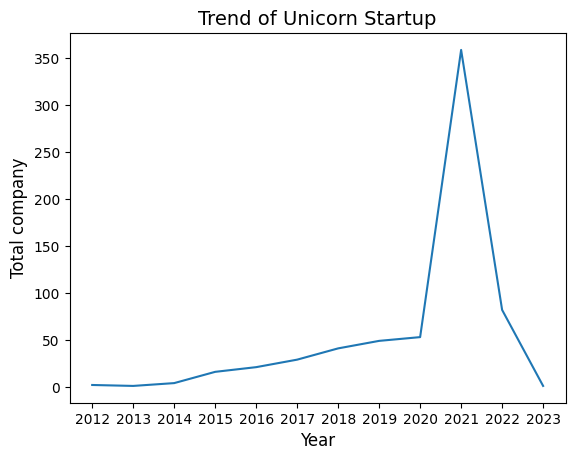

In [40]:
trend_startup = df.groupby('Valuation year')['Company'].count().reset_index()
plt.plot(trend_startup['Valuation year'], trend_startup['Company'])
plt.title('Trend of Unicorn Startup', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Total company', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

> Selanjutnya ingin membuat visualisasi **Top 10 Country Valuation of Unicorn Startup** menggunakan **bar chart horizontal**. Maka data yang kita butuhkan yaitu **Valuation(US$ billions)** dan **Country/contries**. In this case, Valuation dirata-ratakan setiap masing-masing country/countries. Untuk syntax visualisasinya dapat menggunakan syntax di bawah ini : 

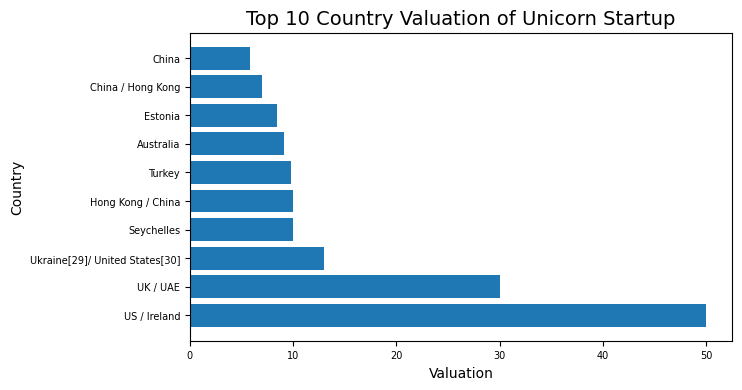

In [41]:
country_valuation = df.groupby('Country/countries')['Valuation(US$ billions)'].mean().reset_index()
top10_country_valuation = country_valuation.sort_values(by='Valuation(US$ billions)', ascending=False).head(10)
top10_country_valuation 
plt.figure(figsize=(7,4))
plt.barh(top10_country_valuation['Country/countries'], top10_country_valuation['Valuation(US$ billions)'])
plt.title('Top 10 Country Valuation of Unicorn Startup', size=14)
plt.ylabel('Country', size=10)
plt.xlabel('Valuation', size=10)
plt.yticks(size=7)
plt.xticks(size=7)
plt.show()

> Terakhir saya ingin melihat **10 teratas industri** apa saja yang banyak terdaftar **di Startup Unicorn**. untuk dapat melihatnya kita dapat dengan membuat visualisasi menggunakan jenis chart yang sesuai. Kali saya ingin membuatnya menggunakan **pie chart**. Untuk membuat pie chart 10 teratas industri pada unicorn starup dapat menggunakan syntax berikut ini.

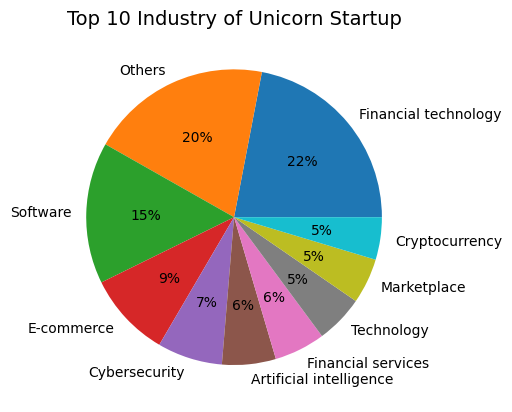

In [42]:
indutry_counts = df['Industry'].value_counts()
top10_industry = indutry_counts.head(10)
plt.pie(top10_industry, labels=top10_industry.index, autopct='%1.0f%%')
plt.title('Top 10 Industry of Unicorn Startup', size=14)
plt.show()

> Sekian mengenai cara visualisasi data menggunakan bahasa pemrograman phython yang saya sampaikan kali ini. saat ini saya masih banyak belajar sehingga mungkin masih banyak kekurangan dan kesalahan yang terjadi baik dalam penyampaian maupun syntax yang sulit dipahami. saya berharap mendapatkan feedback dari pembaca untuk memperbaiki kekurangan dan kesalahan ini.


# **THANK YOU ✌**

